In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img , img_to_array

In [6]:
model = tf.keras.models.load_model("./models/object_detection_model.h5")
print("model loaded")

model loaded


In [7]:
path = "./test_images/Cars153.png"
image = load_img(path)
image = np.array(image,dtype=np.uint8) #8 bit array
image1 = load_img(path,target_size=(224,224))
img_array = img_to_array(image1)/255.0 #convert into array and get normalized utput

In [8]:
#print the size of the original image
h,w,d = image.shape
print(h,w,d)

270 471 3


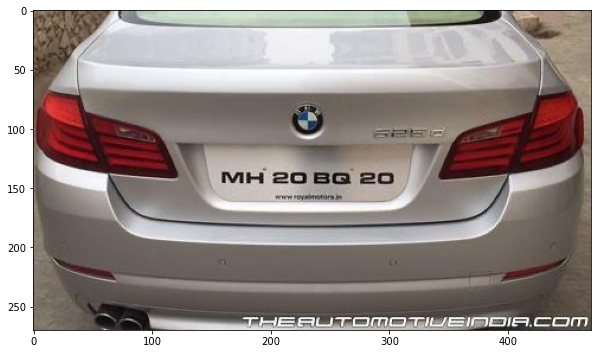

In [9]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [10]:
img_array.shape

(224, 224, 3)

In [11]:
test_arr = img_array.reshape(1,224,224,3) #nb_img , height , width , dense

In [12]:
#make prediction
coords = model.predict(test_arr)
coords

array([[0.31466168, 0.71159387, 0.40836573, 0.5811031 ]], dtype=float32)

In [13]:
#denormalize the output
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[148.20565206, 335.16071105, 110.25874615, 156.89783335]])

In [14]:
#convert values to int
coords = coords.astype(np.int32)
coords

array([[148, 335, 110, 156]])

(148, 110) (335, 156)


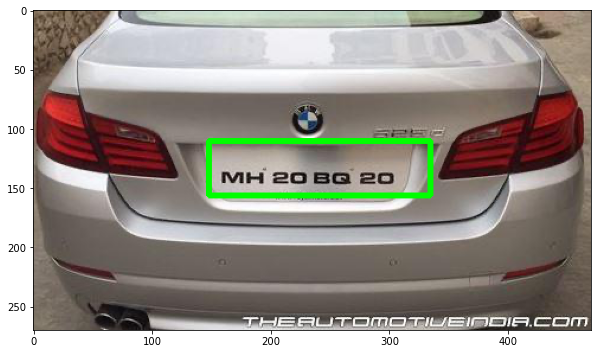

In [15]:
#draw boundingbox on the image
# we need two diagonal points
xmin,xmax,ymin,ymax = coords[0] #get the values of first row
pt1 = (xmin,ymin)
pt2 = (xmax,ymax)
#print the diagonal points
print(pt1,pt2)
#draw the boundingbox
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

#display image
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [16]:
#Pipeline
def object_detection_model(path):
    image = load_img(path)
    image = np.array(image,dtype=np.uint8) #8 bit array
    image1 = load_img(path,target_size=(224,224))
    img_array = img_to_array(image1)/255.0 #convert into array and get normalized utput
    h,w,d = image.shape
    test_arr = img_array.reshape(1,224,224,3) #nb_img , height , width , dense
    #make prediction
    coords = model.predict(test_arr)
    #denormalize the output
    denorm = np.array([w,w,h,h])
    coords = coords * denorm
    #convert values to int
    coords = coords.astype(np.int32)
    #draw boundingbox on the image
    # we need two diagonal points
    xmin,xmax,ymin,ymax = coords[0] #get the values of first row
    pt1 = (xmin,ymin)
    pt2 = (xmax,ymax)
    #print the diagonal points
    print(pt1,pt2)
    #draw the boundingbox
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image,coords

(161, 180) (257, 206)


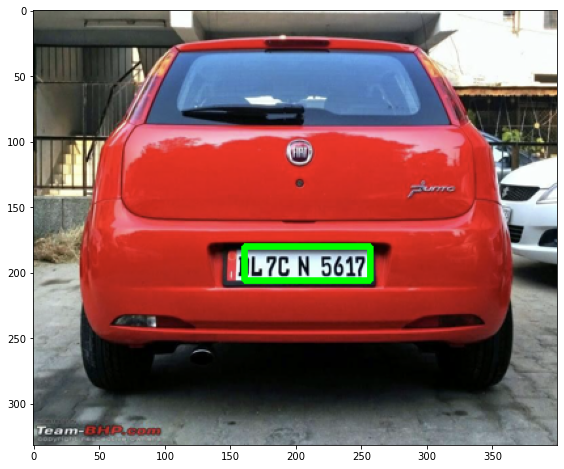

In [89]:
path = "./test_images/Cars34.png"
image,coords = object_detection_model(path)
#display image
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

### OPTICAL CHARACTER RECOGNISSION - OCR

In [90]:
import pytesseract as pt

In [91]:
img = np.array(load_img(path))
#crop image to get only the bounding box
xmin ,xmax,ymin,ymax = coords[0]
# the bounding box
roi = img[ymin:ymax,xmin:xmax]

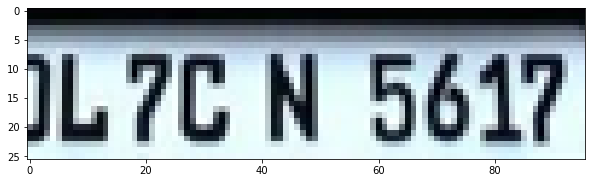

In [92]:
#display image
plt.figure(figsize=(10,8))
plt.imshow(roi)
plt.show()

In [93]:
text = pt.image_to_string(roi)
print(text)

]L7|‘. N 5617


